In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import nltk
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import string

from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize']=(12,6)
sns.set_theme('notebook')

In [ ]:
human_stress=pd.read_csv('/content/Stress.csv')

In [ ]:
human_stress.head(10)

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005
5,relationships,7tx7et,"(30, 35)",I think he doesn't want to put in the effort f...,1,1.0,1517274027
6,domesticviolence,7iphly,"[25, 30]",It was a big company so luckily I didn't have ...,0,0.8,1512854409
7,anxiety,5m3k80,"(5, 10)",It cleared up and I was okay but. On Monday ...,1,0.8,1483582174
8,relationships,7nhy1v,"(50, 55)",I actually give an assistant half my emergency...,1,0.6,1514843984
9,assistance,61eiq6,"[15, 20]",I just feel like the street life has fucked my...,1,1.0,1490428087


In [ ]:
human_stress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subreddit         2838 non-null   object 
 1   post_id           2838 non-null   object 
 2   sentence_range    2838 non-null   object 
 3   text              2838 non-null   object 
 4   label             2838 non-null   int64  
 5   confidence        2838 non-null   float64
 6   social_timestamp  2838 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 155.3+ KB


In [ ]:
human_stress['subreddit'].value_counts()

subreddit
ptsd                584
relationships       552
anxiety             503
domesticviolence    316
assistance          289
survivorsofabuse    245
homeless            168
almosthomeless       80
stress               64
food_pantry          37
Name: count, dtype: int64

In [ ]:
human_stress['len']=[len(text) for text in human_stress['text']]

In [ ]:
human_stress['label_in_value']=human_stress['label'].map({0:'No Stress',1:"Stress"})

In [ ]:
human_stress['date']=[ datetime.fromtimestamp(value) for value in human_stress['social_timestamp']]

In [ ]:
human_stress['day']=[value for value in human_stress['date'].dt.day]

In [ ]:
human_stress['month']=[value for value in human_stress['date'].dt.month]

In [ ]:
human_stress['year']=[value for value in human_stress['date'].dt.year]

In [ ]:
human_stress['hour']=[value for value in human_stress['date'].dt.hour]

In [ ]:
human_stress['second']=[value for value in human_stress['date'].dt.second]

In [ ]:
human_stress['day_name']=[value for value in human_stress['date'].dt.day_name()]

In [ ]:
human_stress['day_of_week']=[value for value in human_stress['date'].dt.day_of_week]

In [ ]:
human_stress.head(10)

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,len,label_in_value,date,day,month,year,hour,second,day_name,day_of_week
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353,571,Stress,2018-03-21 06:39:13,21,3,2018,6,13,Wednesday,2
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817,588,No Stress,2018-05-22 17:23:37,22,5,2018,17,37,Tuesday,1
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605,847,Stress,2018-09-03 00:46:45,3,9,2018,0,45,Monday,0
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555,1277,Stress,2018-01-20 06:25:55,20,1,2018,6,55,Saturday,5
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005,533,Stress,2018-10-17 20:43:25,17,10,2018,20,25,Wednesday,2
5,relationships,7tx7et,"(30, 35)",I think he doesn't want to put in the effort f...,1,1.0,1517274027,539,Stress,2018-01-30 01:00:27,30,1,2018,1,27,Tuesday,1
6,domesticviolence,7iphly,"[25, 30]",It was a big company so luckily I didn't have ...,0,0.8,1512854409,588,No Stress,2017-12-09 21:20:09,9,12,2017,21,9,Saturday,5
7,anxiety,5m3k80,"(5, 10)",It cleared up and I was okay but. On Monday ...,1,0.8,1483582174,548,Stress,2017-01-05 02:09:34,5,1,2017,2,34,Thursday,3
8,relationships,7nhy1v,"(50, 55)",I actually give an assistant half my emergency...,1,0.6,1514843984,436,Stress,2018-01-01 21:59:44,1,1,2018,21,44,Monday,0
9,assistance,61eiq6,"[15, 20]",I just feel like the street life has fucked my...,1,1.0,1490428087,375,Stress,2017-03-25 07:48:07,25,3,2017,7,7,Saturday,5


In [ ]:
remove_cols=['post_id','sentence_range','confidence','social_timestamp','date']
human_stress.drop(remove_cols,axis=1,inplace=True)

In [ ]:
human_stress.groupby('subreddit')['len'].describe().sort_values('count',ascending=False)

,count,mean,std,min,25%,50%,75%,max
subreddit,,,,,,,,
ptsd,584.0,435.296233,157.677362,6.0,330.00,417.5,524.25,1271.0
relationships,552.0,463.898551,167.292838,142.0,354.00,428.0,539.00,1277.0
anxiety,503.0,447.763419,168.015419,6.0,338.00,418.0,532.50,1358.0
domesticviolence,316.0,436.512658,165.901395,6.0,335.00,406.5,512.25,1308.0
assistance,289.0,429.705882,143.763236,32.0,339.00,417.0,503.00,915.0
survivorsofabuse,245.0,473.485714,194.551557,88.0,348.00,437.0,559.00,1606.0
homeless,168.0,449.851190,177.114248,155.0,342.75,425.5,525.25,1281.0
almosthomeless,80.0,447.412500,208.517777,116.0,329.50,417.5,519.00,1639.0
stress,64.0,505.593750,203.001816,172.0,361.50,492.5,601.25,1354.0


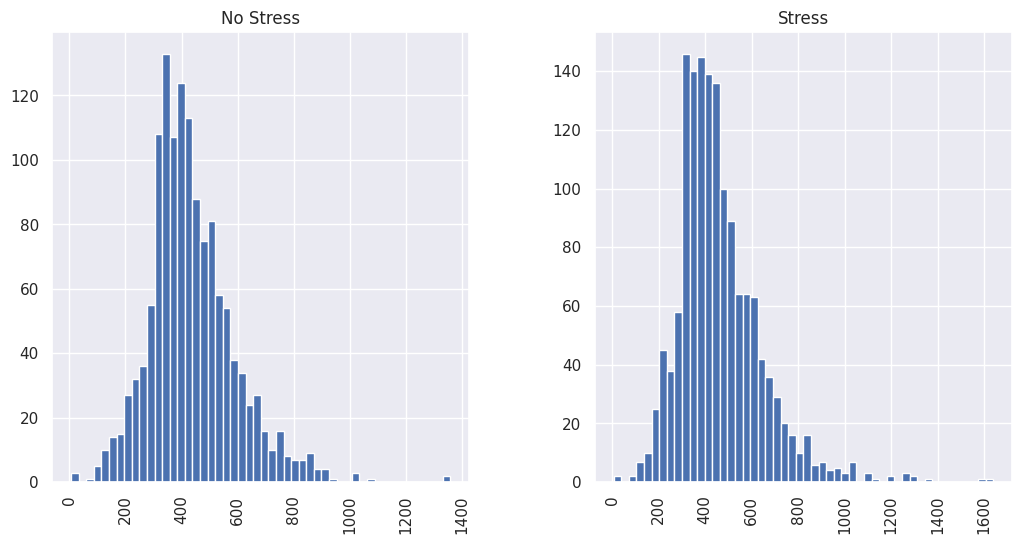

In [ ]:
human_stress.hist(column='len',by='label_in_value',bins=50)
plt.show()

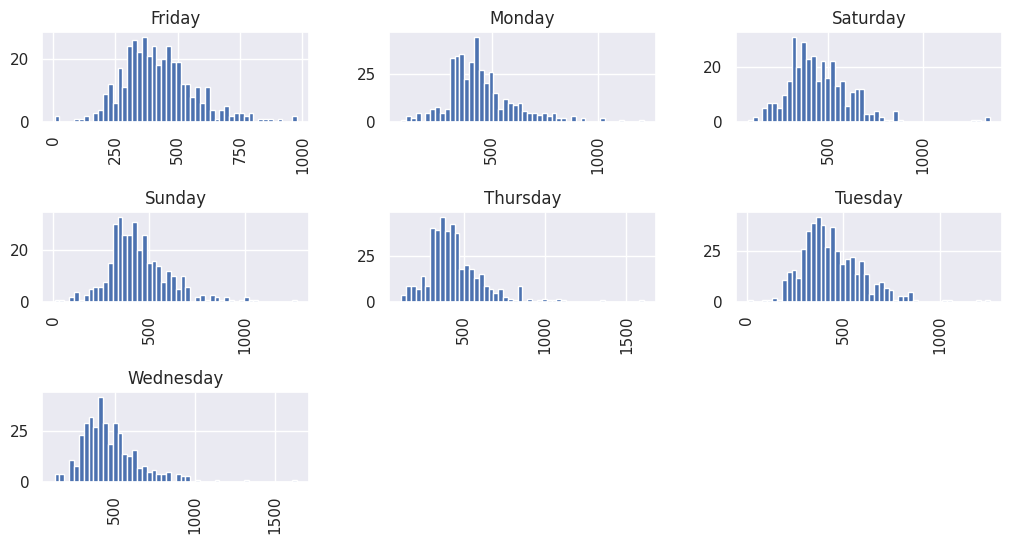

In [ ]:
fig, ax = plt.subplots()
human_stress.hist(column='len',by='day_name',bins=50,ax=ax)
plt.subplots_adjust(hspace=1)
plt.show()

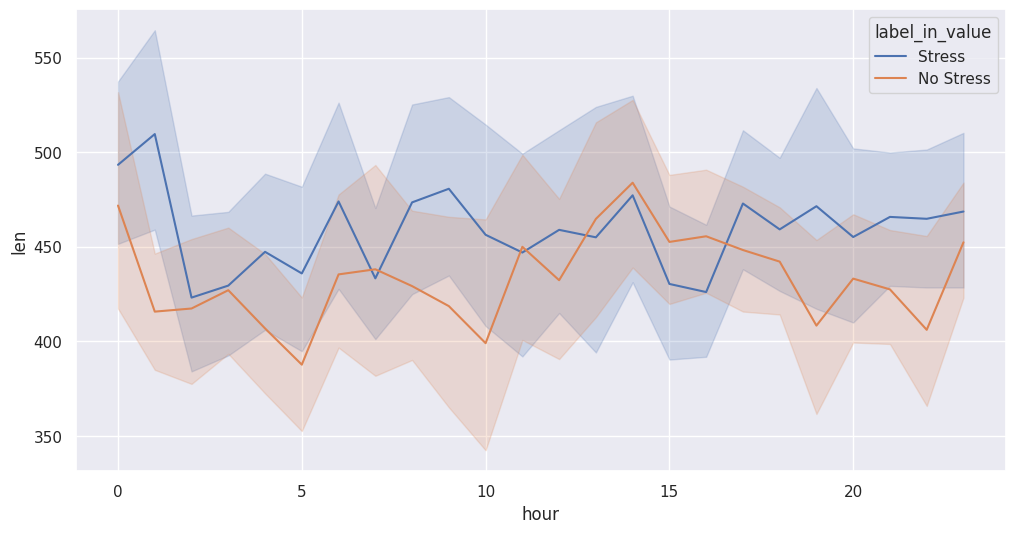

In [ ]:
sns.lineplot(data=human_stress,x='hour',y='len',hue='label_in_value')
plt.show()

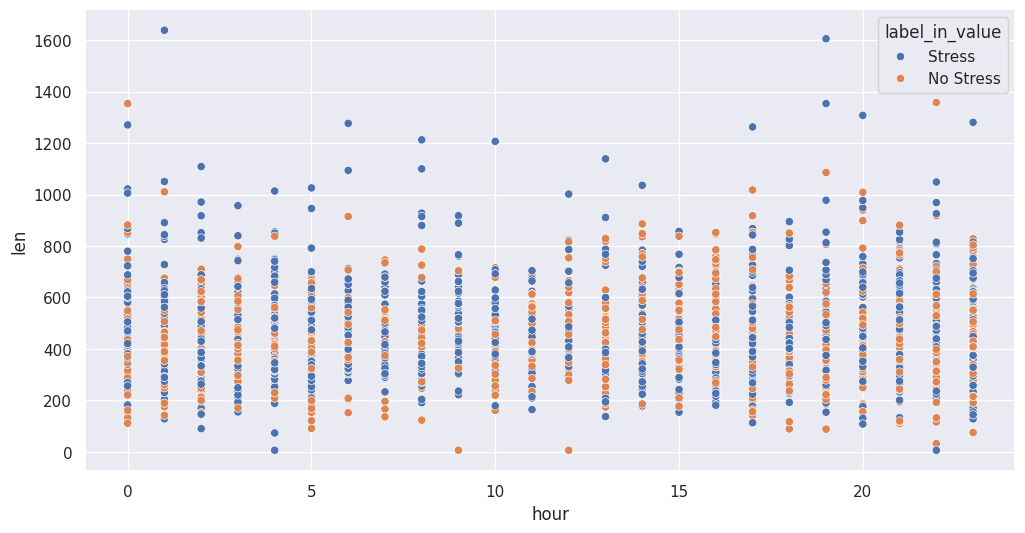

In [ ]:
sns.scatterplot(data=human_stress,x='hour',y='len',hue='label_in_value')
plt.show()

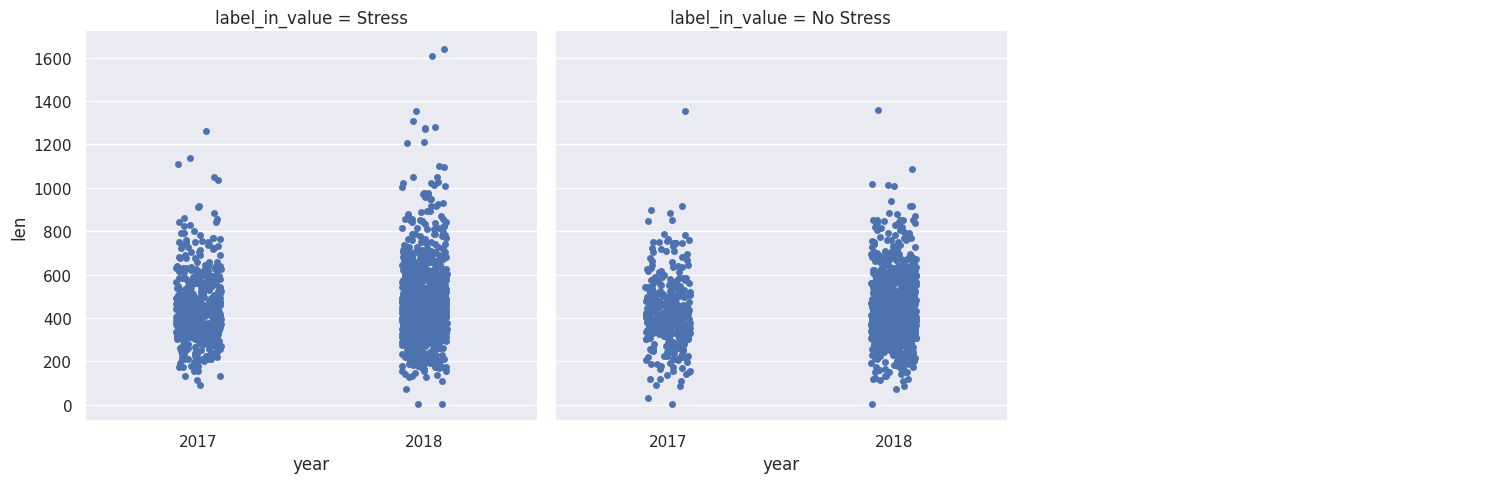

In [ ]:
sns.catplot(data=human_stress,x='year',y='len',col='label_in_value',sharex=False,col_wrap=3)
plt.show()

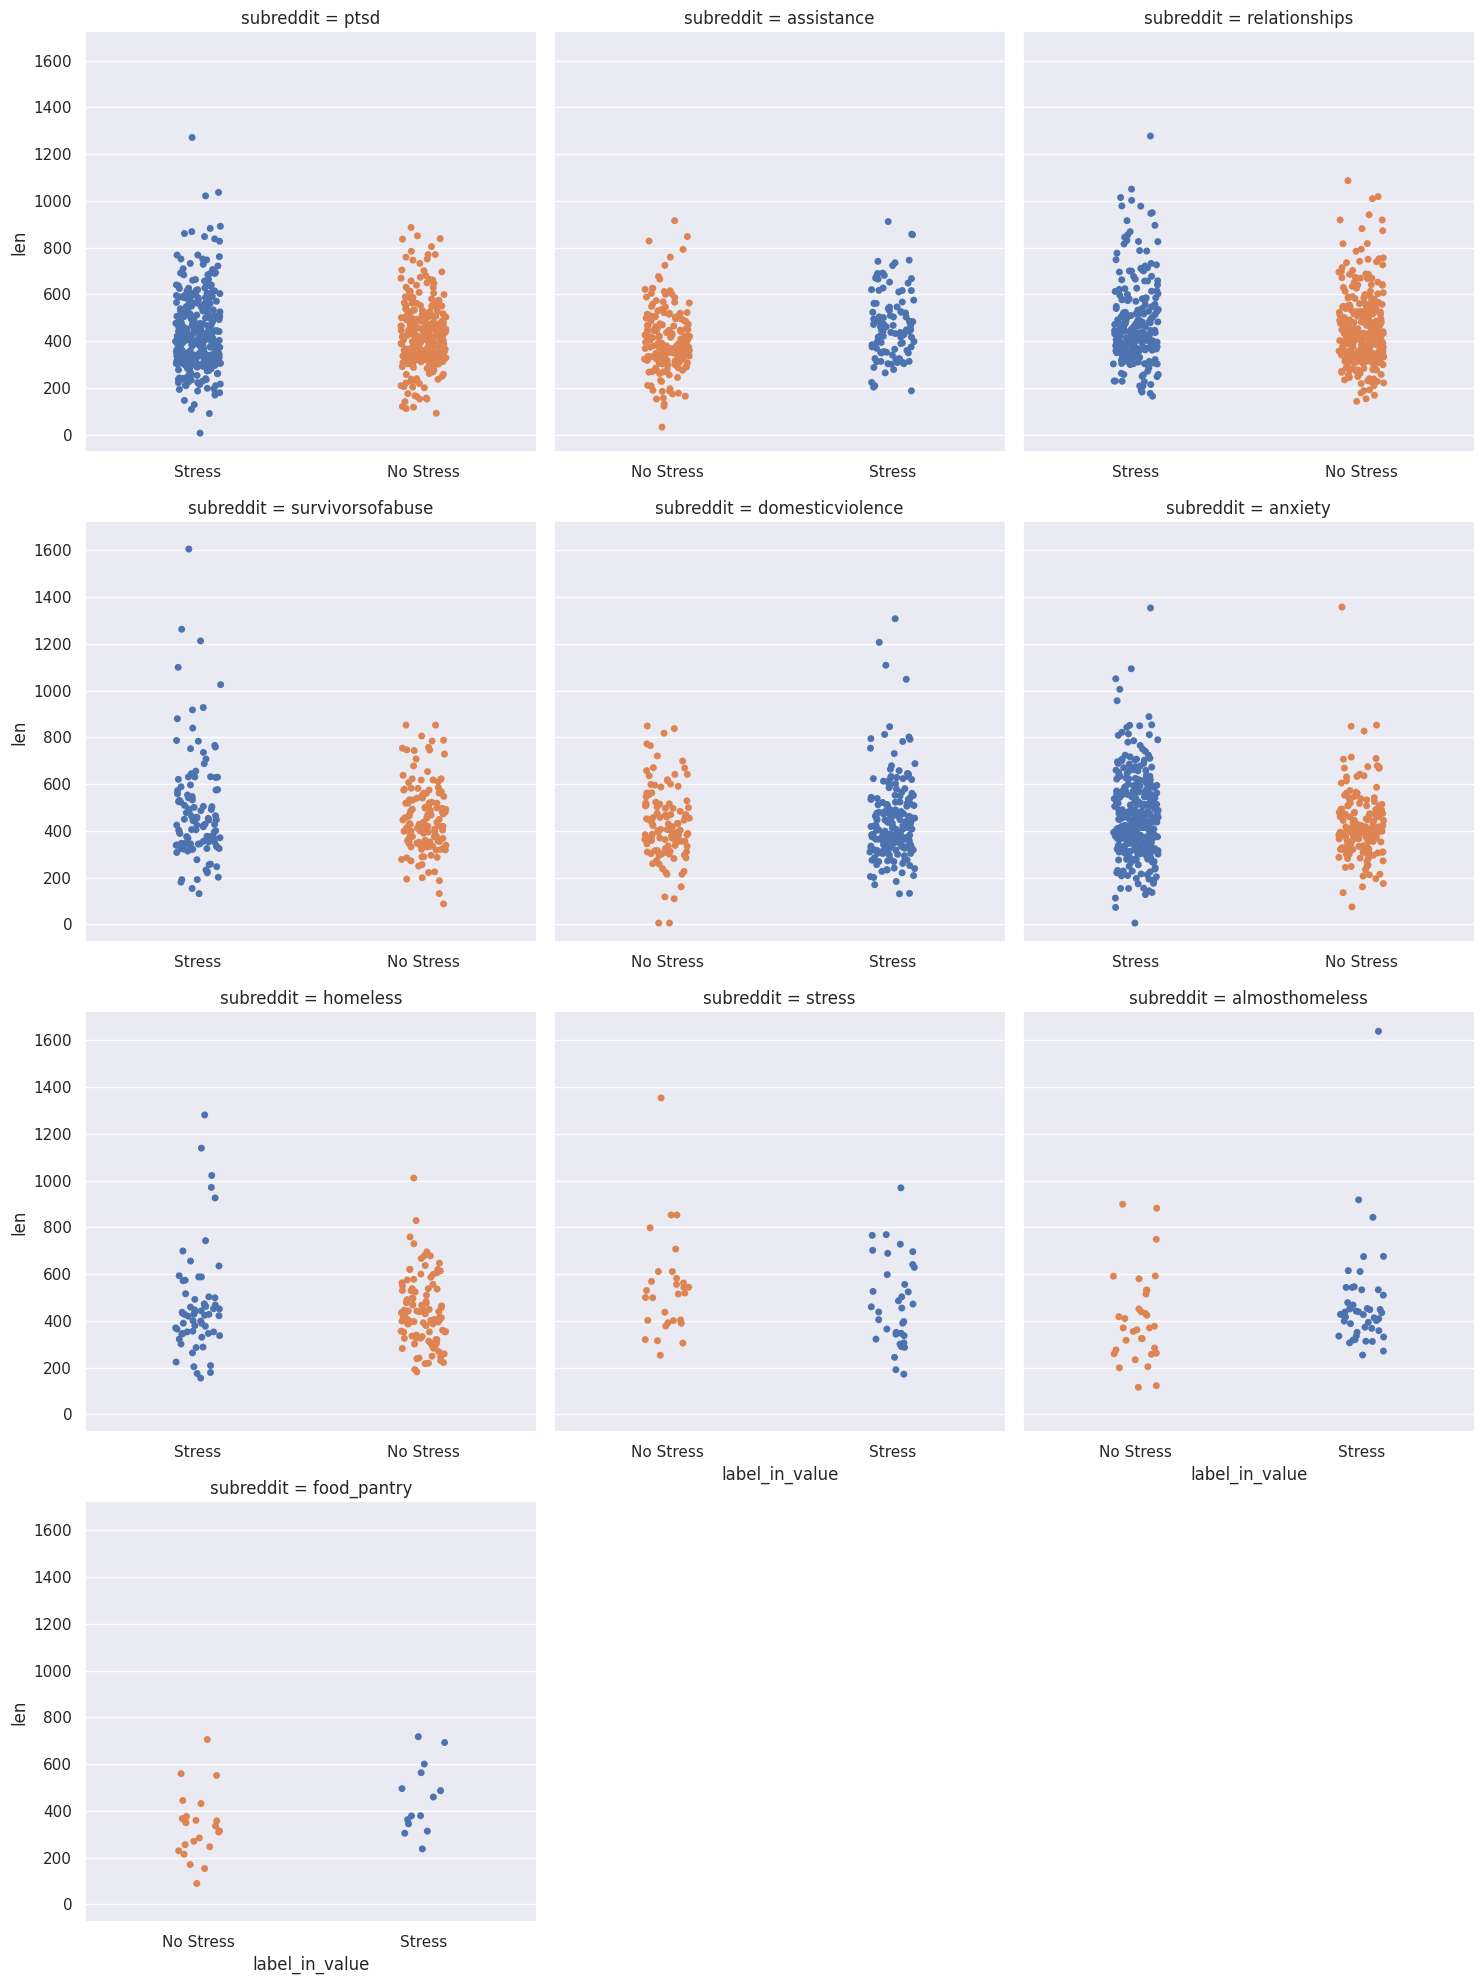

In [ ]:
sns.catplot(data=human_stress,x='label_in_value',y='len',col='subreddit',col_wrap=3,hue='label_in_value',sharex=False)
plt.show()

In [ ]:
X=human_stress['text'].values
y=human_stress['label_in_value'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
def text_clean(text_message):

    remove_punc=[ text for text in text_message if text not in string.punctuation]

    remove_punc= ''.join(remove_punc)

    return [word for word in remove_punc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
human_stress['text'].head(5)

0    He said he had not felt that way before, sugge...
1    Hey there r/assistance, Not sure if this is th...
2    My mom then hit me with the newspaper and it s...
3    until i met my new boyfriend, he is amazing, h...
4    October is Domestic Violence Awareness Month a...
Name: text, dtype: object

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
human_stress['text'].head(5).apply(text_clean)

0    [said, felt, way, suggeted, go, rest, TRIGGER,...
1    [Hey, rassistance, sure, right, place, post, g...
2    [mom, hit, newspaper, shocked, would, knows, d...
3    [met, new, boyfriend, amazing, kind, sweet, go...
4    [October, Domestic, Violence, Awareness, Month...
Name: text, dtype: object

In [ ]:
parameters = {
    'bow__ngram_range': [(1, 1), (1, 2)],
    'tfidf__use_idf': (True, False),
    'classifier__alpha': (1e-2, 1e-3),
}

In [ ]:
pipeline_clf=Pipeline([('bow',CountVectorizer(analyzer=text_clean)),
                   ('tfidf',TfidfTransformer()),
                   ('classifier',MultinomialNB())
                  ])

In [ ]:
gs_clf = GridSearchCV(pipeline_clf, parameters, cv=7)
gs_clf.fit(X_train, y_train)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('bow',
                                        CountVectorizer(analyzer=<function text_clean at 0x7f752b81e0e0>)),
                                       ('tfidf', TfidfTransformer()),
                                       ('classifier', MultinomialNB())]),
             param_grid={'bow__ngram_range': [(1, 1), (1, 2)],
                         'classifier__alpha': (0.01, 0.001),
                         'tfidf__use_idf': (True, False)})

In [ ]:
predictions=gs_clf.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

   No Stress       0.76      0.57      0.65       335
      Stress       0.69      0.84      0.76       375

    accuracy                           0.71       710
   macro avg       0.72      0.70      0.70       710
weighted avg       0.72      0.71      0.71       710



In [ ]:

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

2.15.0


In [ ]:
human_stree_nlp=human_stress.copy()

In [ ]:
X_train_nlp, X_test_nlp, y_train_nlp, y_test_nlp = train_test_split(human_stree_nlp['text'], human_stree_nlp['label'], test_size=0.20, random_state=42)

In [ ]:
X_train_nlp=X_train_nlp.apply(text_clean)

In [ ]:
X_test_nlp= X_test_nlp.apply(text_clean)

In [ ]:
vocab_size=50000
embedding_dim=96
max_length=2000
trunc_type='post'
oov_tok="<oov>"

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train_nlp)
word_index = tokenizer.word_index

##training sequences and labels
train_seqs = tokenizer.texts_to_sequences(X_train_nlp)
train_padded = pad_sequences(train_seqs, maxlen=max_length, truncating=trunc_type)

##testing sequences and labels
test_seqs = tokenizer.texts_to_sequences(X_test_nlp)
test_padded = pad_sequences(test_seqs,maxlen=max_length)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(72, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

##compile the model with loss function, optimizer and metrics
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2000, 96)          4800000   
                                                                 
 global_average_pooling1d (  (None, 96)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 72)                6984      
                                                                 
 dense_1 (Dense)             (None, 1)                 73        
                                                                 
Total params: 4807057 (18.34 MB)
Trainable params: 4807057 (18.34 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
num_epochs = 10

##train the model with training and validation set
history = model.fit(
    train_padded,   #training sequence
    y_train_nlp, # training labels
    epochs=num_epochs,
    validation_data=(test_padded, y_test_nlp) # test data
    )

Epoch 1/10
71/71 [==============================] - 8s 92ms/step - loss: 0.6927 - accuracy: 0.5159 - val_loss: 0.6913 - val_accuracy: 0.5370
Epoch 2/10
71/71 [==============================] - 7s 102ms/step - loss: 0.6924 - accuracy: 0.5211 - val_loss: 0.6904 - val_accuracy: 0.5370
Epoch 3/10
71/71 [==============================] - 6s 84ms/step - loss: 0.6922 - accuracy: 0.5211 - val_loss: 0.6905 - val_accuracy: 0.5370
Epoch 4/10
71/71 [==============================] - 7s 92ms/step - loss: 0.6920 - accuracy: 0.5211 - val_loss: 0.6900 - val_accuracy: 0.5370
Epoch 5/10
71/71 [==============================] - 6s 78ms/step - loss: 0.6915 - accuracy: 0.5211 - val_loss: 0.6899 - val_accuracy: 0.5370
Epoch 6/10
71/71 [==============================] - 6s 91ms/step - loss: 0.6913 - accuracy: 0.5211 - val_loss: 0.6892 - val_accuracy: 0.5370
Epoch 7/10
71/71 [==============================] - 6s 80ms/step - loss: 0.6904 - accuracy: 0.5295 - val_loss: 0.6882 - val_accuracy: 0.5370
Epoch 8/10
7

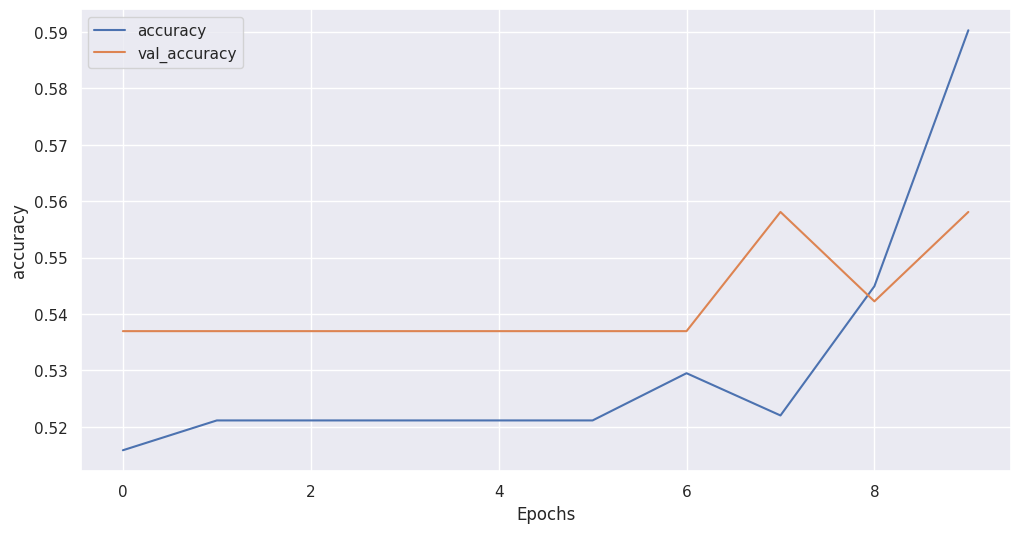

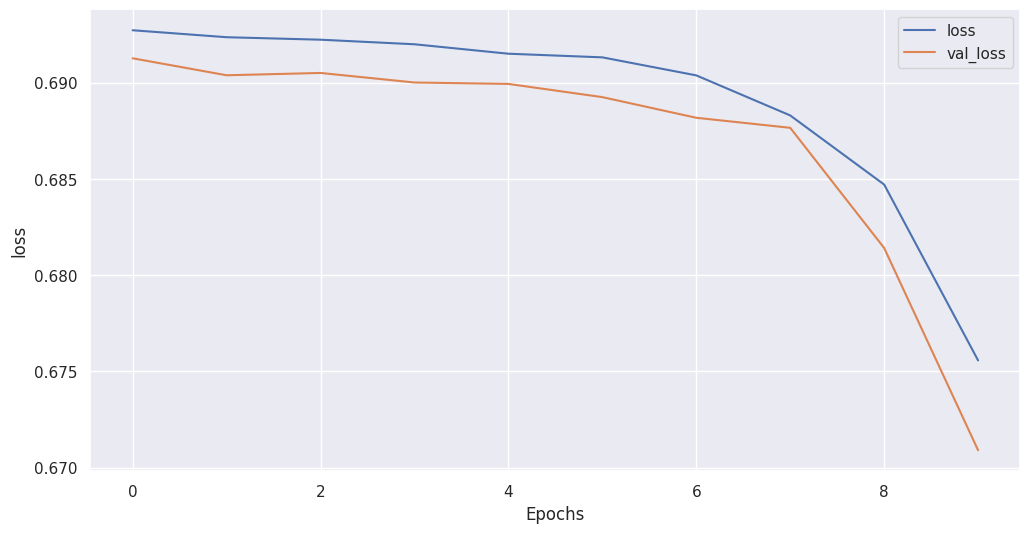

In [ ]:
##plot the scores from history
def plot_metrics(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+ metric])
  plt.legend([metric, 'val_'+ metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.show()

##plot accuracy
plot_metrics(history, "accuracy")

##plot loss
plot_metrics(history, "loss")


In [ ]:
sentence = ["I am not feeling happy",
            "These days i have been working on crucial projects and i have to focus on time delivery",
            "I am on holidays",
            'I bet all my money yesterday and lost it all ',
            "My girlfriend is in the hospital",
            "I lost my job",
            "This year i am not going to this my current year goal and i do not know how i am going to deal with this",
            "The stress is affecting every aspect of my life. I'm not enjoying things I used to, and I'm struggling to find joy in anything",
            "I'm constantly second-guessing myself and worrying about making mistakes. The stress is making it hard to make even simple decisions",
            "I'm struggling to find the motivation to do anything. The stress has drained my energy and left me feeling hopeless",
            "I feel like I'm in a constant state of crisis"]

np_sentence=pd.Series(sentence).apply(text_clean)
##prepare the sequences of the sentences in question
sequences = tokenizer.texts_to_sequences(np_sentence)
padded_seqs = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

##print the classification score
# print(model.predict(padded_seqs))
output={}
for i,seq in enumerate(padded_seqs):
    output[sentence[i]]=model.predict(np.array([seq]))[0]
output = pd.DataFrame.from_dict(output, orient='index', columns=['prediction'])
output.index.name = 'sentence'
output=output.reset_index()
print(output)

1/1 [==============================] - 0s 34ms/step
                                             sentence  prediction
0                              I am not feeling happy    0.521367
1   These days i have been working on crucial proj...    0.521552
2                                    I am on holidays    0.518562
3       I bet all my money yesterday and lost it all     0.521215
4                    My girlfriend is in the hospital    0.520022
5                                       I lost my job    0.521599
6   This year i am not going to this my current ye...    0.526885
7   The stress is affecting every aspect of my lif...    0.534735
8   I'm constantly second-guessing myself and worr...    0.536547
9   I'm struggling to find the motivation to do an...    0.531584
10      I feel like I'm in a constant state of crisis    0.534460


Using CNN

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
from transformers import BertTokenizer

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
df = pd.read_csv('/content/Stress.csv')

In [ ]:
texts = df['text'].tolist()
labels = df['label'].tolist()

In [ ]:
tokenized_texts = [tokenizer.encode(text, add_special_tokens=True) for text in texts]
input_ids = [tokenizer.convert_tokens_to_ids(tokens) for tokens in tokenized_texts]

In [ ]:
# Pad sequences to the same length
max_len = max(len(ids) for ids in input_ids)
input_ids = [ids + [tokenizer.pad_token_id] * (max_len - len(ids)) for ids in input_ids]

In [ ]:
# Convert to PyTorch tensors
import torch
input_ids = torch.tensor(input_ids)
labels = torch.tensor(labels)

In [ ]:
# Split data into train and validation sets
train_inputs, val_inputs, train_labels, val_labels = train_test_split(input_ids, labels, test_size=0.2, random_state=42)

In [ ]:
# Create DataLoader for training and validation sets
train_data = TensorDataset(train_inputs, train_labels)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

In [ ]:
val_data = TensorDataset(val_inputs, val_labels)
val_loader = DataLoader(val_data, batch_size=32)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class CNNTextClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, num_filters, filter_sizes, hidden_dim, output_dim, dropout):
        super(CNNTextClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.convs = nn.ModuleList([
            nn.Conv2d(in_channels=1, out_channels=num_filters, kernel_size=(fs, embedding_dim)) for fs in filter_sizes
        ])
        self.fc = nn.Linear(len(filter_sizes) * num_filters, hidden_dim)
        self.fc_out = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        # x shape: [batch_size, max_len]
        embedded = self.embedding(x)  # shape: [batch_size, max_len, embedding_dim]
        embedded = embedded.unsqueeze(1)  # shape: [batch_size, 1, max_len, embedding_dim]

        conved = [F.relu(conv(embedded)).squeeze(3) for conv in self.convs]  # shape: [batch_size, num_filters, max_len - filter_sizes[n] + 1]
        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]  # shape: [batch_size, num_filters]

        cat = self.dropout(torch.cat(pooled, dim=1))  # shape: [batch_size, len(filter_sizes) * num_filters]

        hidden = self.fc(cat)  # shape: [batch_size, hidden_dim]
        hidden = F.relu(hidden)
        hidden = self.dropout(hidden)

        output = self.fc_out(hidden)  # shape: [batch_size, output_dim]

        return output


In [ ]:
# Define model parameters
VOCAB_SIZE = tokenizer.vocab_size
EMBEDDING_DIM = 100
NUM_FILTERS = 100
FILTER_SIZES = [3, 4, 5]
HIDDEN_DIM = 128
OUTPUT_DIM = 2  # Change based on your task
DROPOUT = 0.5

In [ ]:
# Initialize CNN model
cnn_model = CNNTextClassifier(VOCAB_SIZE, EMBEDDING_DIM, NUM_FILTERS, FILTER_SIZES, HIDDEN_DIM, OUTPUT_DIM, DROPOUT)

In [ ]:
# Define optimizer and loss function
import torch.optim as optim
cnn_optimizer = optim.Adam(cnn_model.parameters())
criterion = nn.CrossEntropyLoss()

In [ ]:
# Training loop
cnn_model.train()
num_epochs=10
for epoch in range(num_epochs):
    epoch_loss = 0
    for batch in train_loader:
        batch_inputs, batch_labels = batch
        cnn_optimizer.zero_grad()
        predictions = cnn_model(batch_inputs)
        loss = criterion(predictions, batch_labels)
        loss.backward()
        cnn_optimizer.step()
        epoch_loss += loss.item()
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(train_loader):.4f}')

Epoch 1/10, Loss: 0.7122
Epoch 2/10, Loss: 0.7044
Epoch 3/10, Loss: 0.6983
Epoch 4/10, Loss: 0.6955
Epoch 5/10, Loss: 0.6960
Epoch 6/10, Loss: 0.6939
Epoch 7/10, Loss: 0.6937
Epoch 8/10, Loss: 0.6943
Epoch 9/10, Loss: 0.6927
Epoch 10/10, Loss: 0.6935


In [ ]:
# Evaluation
cnn_model.eval()
correct = 0
total = 0
with torch.no_grad():
    for batch in val_loader:
        batch_inputs, batch_labels = batch
        predictions = cnn_model(batch_inputs)
        _, predicted = torch.max(predictions, 1)
        total += batch_labels.size(0)
        correct += (predicted == batch_labels).sum().item()

In [ ]:
print(f'Validation Accuracy: {correct / total:.4f}')

Validation Accuracy: 0.5370


Using BERT

In [ ]:
from transformers import BertForSequenceClassification

# Load pre-trained model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

# Set the model to evaluation mode
model.eval()
import torch
from transformers import BertTokenizer

# Load pre-trained model tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# User input
user_input_text = input("Enter your text: ")

# Tokenize input text
tokenized_text = tokenizer.encode_plus(
    user_input_text,
    max_length=128,
    truncation=True,
    padding='max_length',
    return_tensors='pt'
)

# Set the model to evaluation mode
model.eval()

# Forward pass
with torch.no_grad():
    outputs = model(**tokenized_text)

# Get the predicted label
predicted_label = torch.argmax(outputs.logits)

print("Predicted label:", predicted_label.item())


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Enter your text: i feel very good today
Predicted label: 0


In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

# Step 1: Data Preprocessing
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Assuming your CSV file has columns named 'text' and 'label'
texts = df['text'].tolist()
labels = df['label'].tolist()

# Tokenize input texts
input_ids = []
attention_masks = []
for text in texts:
    encoded_dict = tokenizer.encode_plus(
                        text,                      # Text to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])
# Convert lists into tensors
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Step 2: Model Configuration
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",  # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2,  # The number of output labels--2 for binary classification.
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Step 3: Fine-Tuning
# Split data into train and validation sets
train_inputs, val_inputs, train_labels, val_labels = train_test_split(input_ids, labels, test_size=0.2, random_state=42)
train_masks, val_masks, _, _ = train_test_split(attention_masks, input_ids, test_size=0.2, random_state=42)

# Create DataLoader for training
batch_size = 32
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_dataloader = DataLoader(train_data, batch_size=batch_size)

# Set the model to training mode
model.train()

# Set up optimizer and scheduler
optimizer = AdamW(model.parameters(), lr = 2e-5, eps = 1e-8)

# Step 4: Training Loop
epochs = 3
for epoch in range(epochs):
    for batch in train_dataloader:
        b_input_ids = batch[0]
        b_input_mask = batch[1]
        b_labels = batch[2]
        optimizer.zero_grad()
        outputs = model(b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask,
                    labels=b_labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()



Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import numpy as np

def flat_accuracy(preds, labels):
    """
    Function to calculate the accuracy of our predictions vs labels
    """
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

# Step 5: Evaluation
# Evaluate the model on the validation set
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

total_eval_accuracy = 0
for batch in val_dataloader:
    b_input_ids = batch[0].to(device)
    b_input_mask = batch[1].to(device)
    b_labels = batch[2].to(device)
    with torch.no_grad():
        outputs = model(b_input_ids,
                        token_type_ids=None,
                        attention_mask=b_input_mask)
    logits = outputs.logits
    # Move logits to CPU for numpy conversion
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    total_eval_accuracy += flat_accuracy(logits, label_ids)

# Average accuracy over all batches
avg_val_accuracy = total_eval_accuracy / len(val_dataloader)

print("Validation Accuracy: {0:.2f}".format(avg_val_accuracy))



NameError: name 'val_dataloader' is not defined

In [ ]:
def predict(text):
    encoded_dict = tokenizer.encode_plus(
                        text,                      # Text to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    input_ids = encoded_dict['input_ids']
    attention_mask = encoded_dict['attention_mask']

    # Move input tensors to CPU
    input_ids = input_ids.to('cpu')
    attention_mask = attention_mask.to('cpu')

    with torch.no_grad():
        # Move model to CPU
        model.to('cpu')

        outputs = model(input_ids,
                        token_type_ids=None,
                        attention_mask=attention_mask)
    logits = outputs.logits
    # Get the predicted label
    predicted_label = torch.argmax(logits, dim=1).item()
    return predicted_label




In [ ]:
text = "I feel good today"
predicted_label = predict(text)
print("Predicted label:", predicted_label)

In [ ]:
text="i feel bad today"
predicted_label=predict(text)
print("predicted label:", predicted_label)

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Initialize lists to store accuracy values
train_acc_values = []
val_acc_values = []

# Step 5: Evaluation
# Evaluate the model on the validation set
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)  # Move the model to the appropriate device

for epoch in range(epochs):
    model.train()  # Set the model to training mode

    # Initialize variables for accuracy calculation
    total_train_accuracy = 0
    total_train_examples = 0

    for batch in train_dataloader:
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        optimizer.zero_grad()
        outputs = model(b_input_ids,
                        token_type_ids=None,
                        attention_mask=b_input_mask,
                        labels=b_labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        # Calculate accuracy for this batch
        logits = outputs.logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        total_train_accuracy += flat_accuracy(logits, label_ids) * len(label_ids)
        total_train_examples += len(label_ids)

    # Average accuracy for the epoch
    epoch_train_accuracy = total_train_accuracy / total_train_examples
    train_acc_values.append(epoch_train_accuracy)

    # Evaluate on validation set
    model.eval()  # Set the model to evaluation mode
    total_eval_accuracy = 0
    total_eval_examples = 0

    for batch in val_dataloader:
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        with torch.no_grad():
            outputs = model(b_input_ids,
                            token_type_ids=None,
                            attention_mask=b_input_mask)
        logits = outputs.logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        total_eval_accuracy += flat_accuracy(logits, label_ids) * len(label_ids)
        total_eval_examples += len(label_ids)

    # Average validation accuracy for the epoch
    epoch_val_accuracy = total_eval_accuracy / total_eval_examples
    val_acc_values.append(epoch_val_accuracy)

# Plotting accuracy curves
epochs = range(1, epochs + 1)
plt.plot(epochs, train_acc_values, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Data Preprocessing
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Assuming your CSV file has columns named 'text' and 'label'
texts = df['text'].tolist()
labels = df['label'].tolist()

In [ ]:
# Tokenize input texts
input_ids = []
attention_masks = []
for text in texts:
    encoded_dict = tokenizer.encode_plus(
                        text,                      # Text to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

# Convert lists into tensors
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

In [ ]:
# Define flat accuracy function
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)


In [ ]:

# Step 2: Model Configuration
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",  # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2,  # The number of output labels--2 for binary classification.
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Step 3: Fine-Tuning
# Split data into train and validation sets
train_inputs, val_inputs, train_labels, val_labels = train_test_split(input_ids, labels, test_size=0.2, random_state=42)
train_masks, val_masks, _, _ = train_test_split(attention_masks, input_ids, test_size=0.2, random_state=42)


In [ ]:
# Create DataLoader for training
batch_size = 32
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_dataloader = DataLoader(train_data, batch_size=batch_size)


In [ ]:
# Set up optimizer and scheduler
optimizer = AdamW(model.parameters(), lr = 2e-5, eps = 1e-8)


In [ ]:
# Training variables
train_accuracy_values = []
epochs = 3

In [ ]:
# Step 4: Training Loop
for epoch in range(epochs):
    # Training
    model.train()
    total_train_accuracy = 0

    for batch in train_dataloader:
        b_input_ids = batch[0]
        b_input_mask = batch[1]
        b_labels = batch[2]

        optimizer.zero_grad()

        outputs = model(b_input_ids,
                        token_type_ids=None,
                        attention_mask=b_input_mask,
                        labels=b_labels)

        loss = outputs.loss
        loss.backward()
        optimizer.step()

        logits = outputs.logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        accuracy = flat_accuracy(logits, label_ids)
        total_train_accuracy += accuracy

    # Average training accuracy for this epoch
    avg_train_accuracy = total_train_accuracy / len(train_dataloader)
    train_accuracy_values.append(avg_train_accuracy)
    print(f"Epoch {epoch+1}/{epochs}, Training Accuracy: {avg_train_accuracy:.4f}")


Epoch 1/3, Training Accuracy: 0.9242
Epoch 2/3, Training Accuracy: 0.9207
Epoch 3/3, Training Accuracy: 0.9727


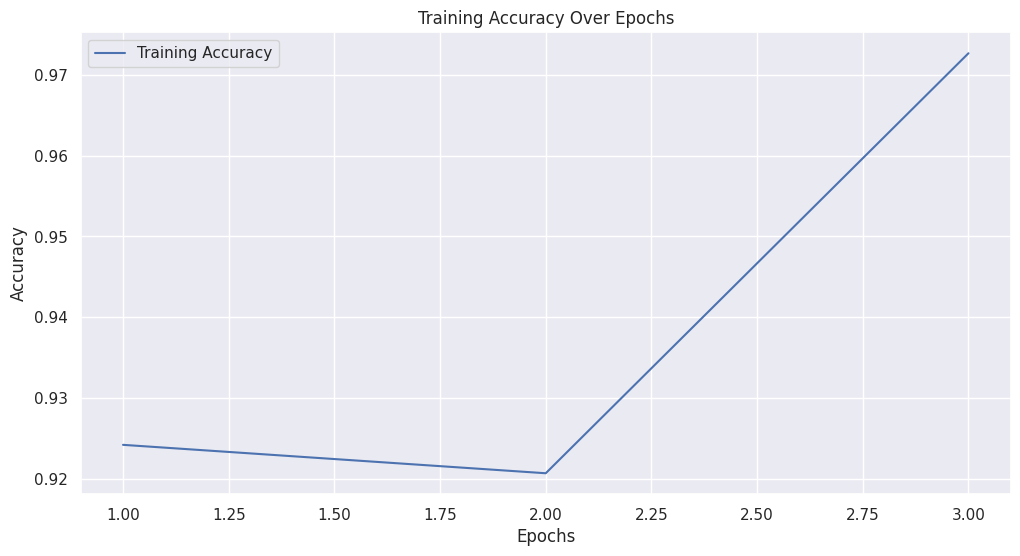

In [ ]:
# Visualize the training accuracy
plt.plot(range(1, epochs+1), train_accuracy_values, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.legend()
plt.show()